# K-Means Run Down


This notebook is a step by step demonstration of how [_k_-means clustering](https://en.wikipedia.org/wiki/K-means_clustering) works.

---

First, we obtain some 2D data points. Then randomly pick $k$ initial centroids (this initialization process is called the [Forgy](https://en.wikipedia.org/wiki/K-means_clustering#Initialization_methods) method--as opposed to _Random Partition_).

In [1]:
points = [(4,9), (2,10), (1,2), (2,5),(6,4), (8,4), (7,5), (5,8)]  # n = 8
centroids = [(2,10), (1,2), (5,8)]  # k = 3
ctnames = ['α', 'β', 'γ']  # centroid names

## Iteration 1

In [2]:
import math

def euclidean_dist(a, b):
    """Euclidean distances between two points"""
    return math.sqrt(sum((p - q)**2 for p, q in zip(a, b)))


def e_step(points, centroids):
    """
    The Expectation Step:
        Assign binary indicators for each point and cluster.
    """
    binaries = []
    clusters = []  # cluster labels for each point
    print('   α     β     γ     min')
    for i, point in enumerate(points):
        distances = [euclidean_dist(point, centroid) for centroid in centroids]
        min_dist, idx = min((val, idx) for idx, val in enumerate(distances))
        clusters.append(idx)
        binaries.append([int(x == min_dist) for x in distances])
        print(f'{chr(65 + i)} ', '  '.join([f'{x:.2f}' for x in distances]), ' ', ctnames[idx])
    return binaries, clusters

binaries, clusters_1 = e_step(points, centroids)

   α     β     γ     min
A  2.24  7.62  1.41   γ
B  0.00  8.06  3.61   α
C  8.06  0.00  7.21   β
D  5.00  3.16  4.24   β
E  7.21  5.39  4.12   γ
F  8.49  7.28  5.00   γ
G  7.07  6.71  3.61   γ
H  3.61  7.21  0.00   γ


Above table shows the distances between each point and each centroid, and for each point, the centroid of the minimal distance. This produces a list of binary indicators $\textbf{r}$, and is saved in the `binaries` variables.

Let's visualize our clusters so far.

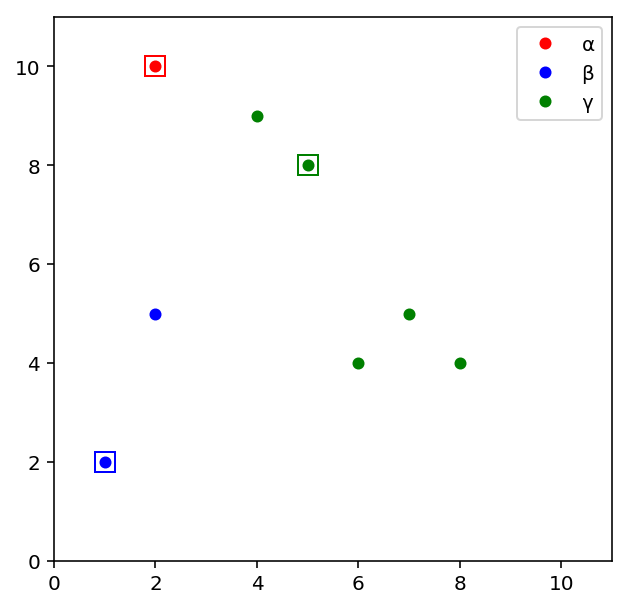

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

colors = ['red', 'blue', 'green']

def plot_clusters(points, clusters, centroids):
    plt.figure(figsize=(5, 5))
    for k, name in enumerate(ctnames):
        # get points of current cluster
        pts = [p for i, p in enumerate(points) if clusters[i] == k]
        plt.plot(centroids[k][0], centroids[k][1], marker='s',
                  markerfacecolor='white', linestyle='', ms=10, color=colors[k])
        plt.plot([x[0] for x in pts], [x[1] for x in pts],
                 marker='o', linestyle='', ms=5, label=name, color=colors[k])
    plt.axis([0, 11, 0, 11])
    plt.legend(loc='upper right')
    plt.show()

plot_clusters(points, clusters_1, centroids)

Then for each centroid $\textbf{u}_k$, we calculate its new position with 
$$
\textbf{u}_k = \frac{\sum_n r_{nk} \, \textbf{x}_n}{\sum_n r_{nk}},
$$

where $\textbf{u}_k$ and $\textbf{x}_n$ are vectors, representing centroids and data points respectively.

In [4]:
def m_step(points, binaries):
    """Maximization: calculate the centroids based on known clusters"""
    ret = []
    n_cluster = len(binaries[0])  # total number of clusters
    d = len(points[0])    # dimension of the data point
    for k in range(n_cluster):
        r_sum = sum(r[k] for r in binaries)
        ret.append([
            sum(x[d_i]*binaries[n][k] for n, x in enumerate(points)) / r_sum
            for d_i in range(d)
        ])
    for i, x in enumerate(ctnames):
        print(f'{x}  {tuple(ret[i])}')
    return ret
    
centroids_1 = m_step(points, binaries)

α  (2.0, 10.0)
β  (1.5, 3.5)
γ  (6.0, 6.0)


This updates the position of the centroids. 

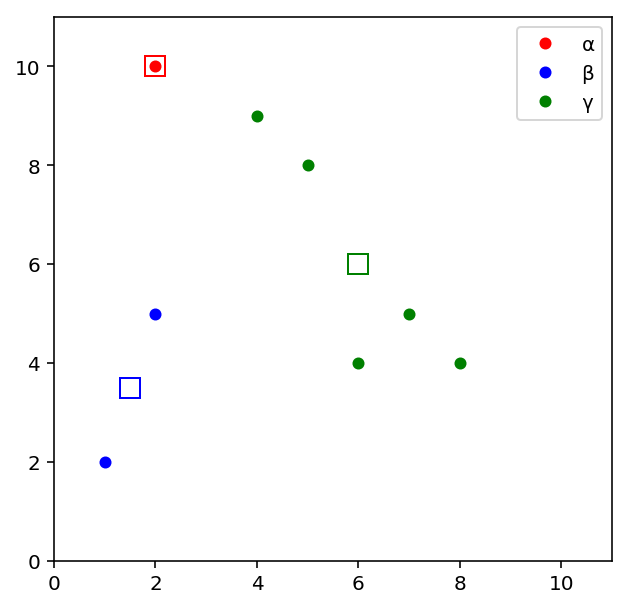

In [5]:
plot_clusters(points, clusters_1, centroids_1)

Then we repeat the process until it converges (binary indicators doesn't change).

## Iteration 2

First, assign points to their nearest centroids.

   α     β     γ     min
A  2.24  6.04  3.61   α
B  0.00  6.52  5.66   α
C  8.06  1.58  6.40   β
D  5.00  1.58  4.12   β
E  7.21  4.53  2.00   γ
F  8.49  6.52  2.83   γ
G  7.07  5.70  1.41   γ
H  3.61  5.70  2.24   γ


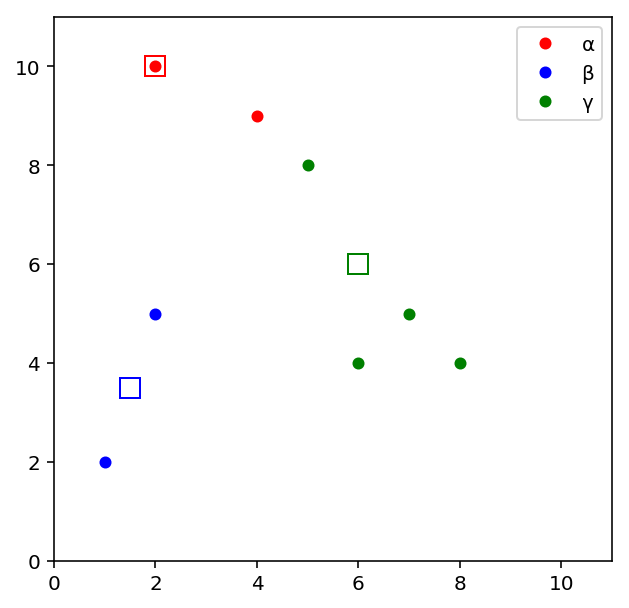

In [6]:
binaries, clusters_2 = e_step(points, centroids_1)
plot_clusters(points, clusters_2, centroids_1)

Then update the position of the centroids.

α  (3.0, 9.5)
β  (1.5, 3.5)
γ  (6.5, 5.25)


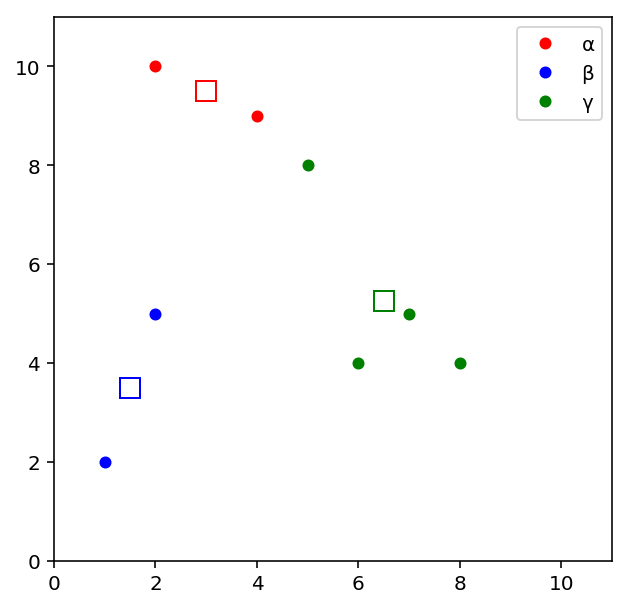

In [7]:
centroids_2 = m_step(points, binaries)
plot_clusters(points, clusters_2, centroids_2)

## Iteration 3

   α     β     γ     min
A  1.12  6.04  4.51   α
B  1.12  6.52  6.54   α
C  7.76  1.58  6.39   β
D  4.61  1.58  4.51   β
E  6.26  4.53  1.35   γ
F  7.43  6.52  1.95   γ
G  6.02  5.70  0.56   γ
H  2.50  5.70  3.13   α


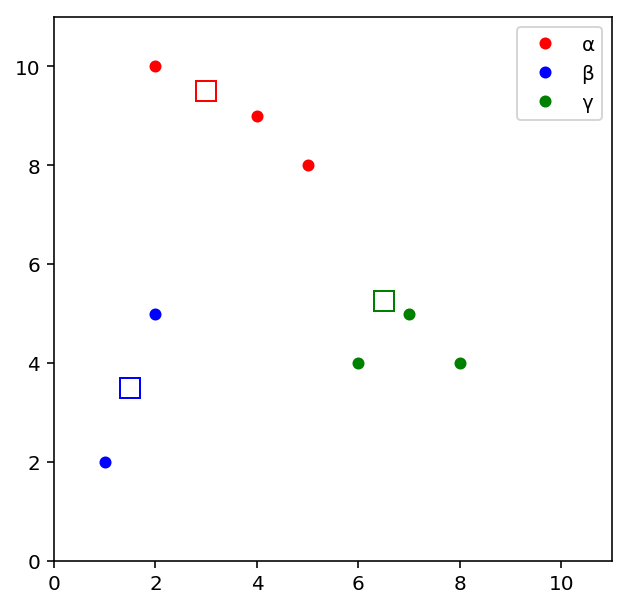

In [8]:
binaries, clusters_3 = e_step(points, centroids_2)
plot_clusters(points, clusters_3, centroids_2)

α  (3.6666666666666665, 9.0)
β  (1.5, 3.5)
γ  (7.0, 4.333333333333333)


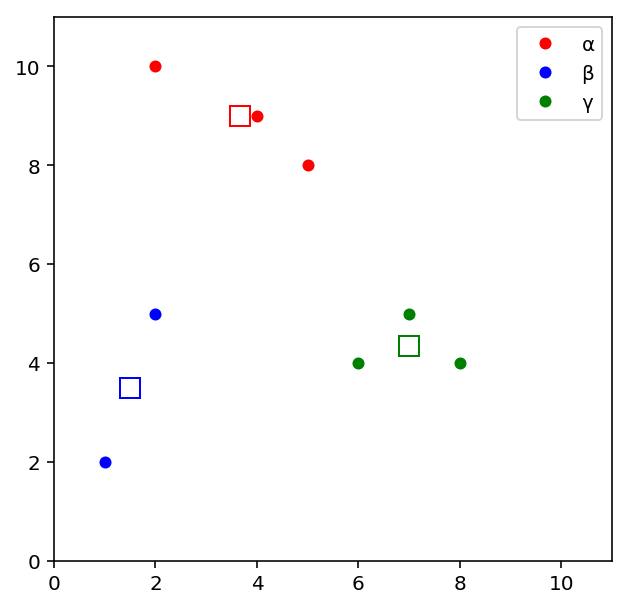

In [9]:
centroids_3 = m_step(points, binaries)
plot_clusters(points, clusters_3, centroids_3)

## Iteration 4

   α     β     γ     min
A  0.33  6.04  5.55   α
B  1.94  6.52  7.56   α
C  7.49  1.58  6.44   β
D  4.33  1.58  5.04   β
E  5.52  4.53  1.05   γ
F  6.62  6.52  1.05   γ
G  5.21  5.70  0.67   γ
H  1.67  5.70  4.18   α


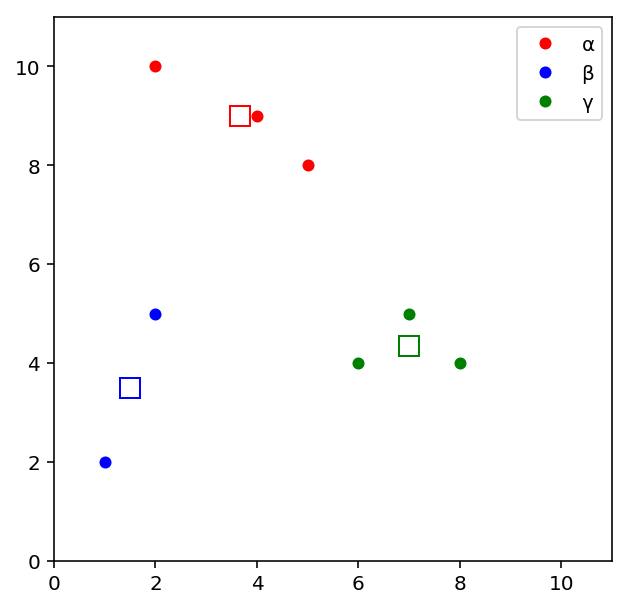

In [10]:
binaries, clusters_4 = e_step(points, centroids_3)
plot_clusters(points, clusters_4, centroids_3)

The cluster assignment is exactly the same as Iteration 3. We can stop further computation.